# Project Milestone
# Breaking Bad Episodes Data

### Breaking Bad is a drama series created by Vince Gilligan, which premiered from 2008 to 2013 on AMC

### After a high school chemistry teacher is diagnosed with lung cancer, he uses his chemistry knowledge to cook crystal meth with his former student in order to secure his family's financial future before he dies from the disease.

### 5 seasons and a total of 62 episodes

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import csv

In [2]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_Breaking_Bad_episodes')
soup = BeautifulSoup(page.text, 'html.parser')

In [3]:
with open('BreakingData.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([
        'No. in season', 
        'Title', 
        'Directed by', 
        'Written by', 
        'Original air date', 
        'U.S. viewers (millions)'
    ])

    no_in_season = []
    title = []
    directed = []
    written = []
    air_date = []
    viewers = []

    s1 = soup.find_all('table', class_='wikiepisodetable')[0]
    s2 = soup.find_all('table', class_='wikiepisodetable')[1]
    s3 = soup.find_all('table', class_='wikiepisodetable')[2]
    s4 = soup.find_all('table', class_='wikiepisodetable')[3]
    s5 = soup.find_all('table', class_='wikiepisodetable')[4]

    eps1 = [[item.text for item in row_data.select('th,td')]
                for row_data in s1.select('tr')]
    eps2 = [[item.text for item in row_data.select('th,td')]
                for row_data in s2.select('tr')]
    eps3 = [[item.text for item in row_data.select('th,td')]
                for row_data in s3.select('tr')]
    eps4 = [[item.text for item in row_data.select('th,td')]
                for row_data in s4.select('tr')]
    eps5 = [[item.text for item in row_data.select('th,td')]
                for row_data in s5.select('tr')]

    for data in eps1:
        writer.writerow(data)
    for data in eps2:
        writer.writerow(data)
    for data in eps3:
        writer.writerow(data)
    for data in eps4:
        writer.writerow(data)
    for data in eps5:
        writer.writerow(data)

## Not the prettiest code, but it works

In [24]:
bb = pd.read_csv('BreakingData.csv', encoding='latin-1', error_bad_lines=False, warn_bad_lines=False)

In [5]:
BreakingData = bb

In [6]:
BreakingData = BreakingData.drop(BreakingData.index[[0,8,22,36,50,51,60]])

# Breaking Bad Episodes Data

In [7]:
BreakingData['U.S. viewers (millions)'] = BreakingData['U.S. viewers (millions)'].str[:-4]
BreakingData

C:\Users\scott\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,No. in season,Title,Directed by,Written by,Original air date,U.S. viewers (millions)
1,1,"""Pilot""",Vince Gilligan,Vince Gilligan,"January 20, 2008 (2008-01-20)",1.4
2,2,"""Cat's in the Bag...""",Adam Bernstein,Vince Gilligan,"January 27, 2008 (2008-01-27)",1.4
3,3,"""...And the Bag's in the River""",Adam Bernstein,Vince Gilligan,"February 10, 2008 (2008-02-10)",1.0
4,4,"""Cancer Man""",Jim McKay,Vince Gilligan,"February 17, 2008 (2008-02-17)",1.0
5,5,"""Gray Matter""",Tricia Brock,Patty Lin,"February 24, 2008 (2008-02-24)",0.9
...,...,...,...,...,...,...
58,12,"""Rabid Dog""",Sam Catlin,Sam Catlin,"September 1, 2013 (2013-09-01)",4.41
59,13,"""To'hajiilee""",Michelle MacLaren,George Mastras,"September 8, 2013 (2013-09-08)",5.11
60,14,"""Ozymandias""",Rian Johnson,Moira Walley-Beckett,"September 15, 2013 (2013-09-15)",6.37
61,15,"""Granite State""",Peter Gould,Peter Gould,"September 22, 2013 (2013-09-22)",6.58


# Who wrote the most episodes?

In [8]:
Writtenby = BreakingData['Written by'].value_counts()[:3]
Writtenby

Vince Gilligan    12
Peter Gould        8
George Mastras     7
Name: Written by, dtype: int64

### 1. Vince Gilligan (creator) wrote 12 episodes

In [26]:
VinceGilligan = BreakingData[['No. in season', 'Title', 'U.S. viewers (millions)']][BreakingData['Written by']=='Vince Gilligan']
VinceGilligan

,No. in season,Title,U.S. viewers (millions)
1,1,"""Pilot""",1.40
2,2,"""Cat's in the Bag...""",1.40
3,3,"""...And the Bag's in the River""",1.00
4,4,"""Cancer Man""",1.00
20,13,"""ABQ""",1.50
21,1,"""No Más""",1.95
33,13,"""Full Measure""",1.56
34,1,"""Box Cutter""",2.58
46,13,"""Face Off""",1.90
47,1,"""Live Free or Die""",2.93


### 2. Peter Gould wrote 8 episodes

In [10]:
PeterGould = BreakingData[['No. in season', 'Title', 'U.S. viewers (millions)']][BreakingData['Written by']=='Peter Gould']
PeterGould

,No. in season,Title,U.S. viewers (millions)
7,7,"""A No-Rough-Stuff-Type Deal""",1.5
10,3,"""Bit by a Dead Bee""",1.13
15,8,"""Better Call Saul""",1.04
22,2,"""Caballo sin Nombre""",1.55
40,7,"""Problem Dog""",1.91
49,3,"""Hazard Pay""",2.20
55,9,"""Blood Money""",5.92
61,15,"""Granite State""",6.58


### 3. George Mastras wrote 7 episodes

In [11]:
GeorgeMastras = BreakingData[['No. in season', 'Title', 'U.S. viewers (millions)']][BreakingData['Written by']=='George Mastras']
GeorgeMastras

,No. in season,Title,U.S. viewers (millions)
6,6,"""Crazy Handful of Nothin'""",1.0
9,2,"""Grilled""",1.6
18,11,"""Mandala""",NaN
23,3,"""I.F.T.""",1.33
35,2,"""Thirty-Eight Snub""",1.97
51,5,"""Dead Freight""",2.48
59,13,"""To'hajiilee""",5.11


# Who directed the most episodes?

In [12]:
Directedby = BreakingData['Directed by'].value_counts()[:5]
Directedby

Michelle MacLaren    11
Adam Bernstein        8
Vince Gilligan        5
Michael Slovis        4
Colin Bucksey         4
Name: Directed by, dtype: int64

### 1. Michelle MacLaren directed 11 episodes

In [13]:
MichelleMacLaren = BreakingData[['No. in season', 'Title', 'U.S. viewers (millions)']][BreakingData['Directed by']=='Michelle MacLaren']
MichelleMacLaren

,No. in season,Title,U.S. viewers (millions)
16,9,"""4 Days Out""",NaN
23,3,"""I.F.T.""",1.33
27,7,"""One Minute""",1.52
31,11,"""Abiquiu""",1.32
35,2,"""Thirty-Eight Snub""",1.97
38,5,"""Shotgun""",1.75
43,10,"""Salud""",1.80
48,2,"""Madrigal""",2.29
54,8,"""Gliding Over All""",2.78
56,10,"""Buried""",4.77


### 2. Adam Bernstein directed 8 episodes

In [14]:
AdamBernstein = BreakingData[['No. in season', 'Title', 'U.S. viewers (millions)']][BreakingData['Directed by']=='Adam Bernstein']
AdamBernstein

,No. in season,Title,U.S. viewers (millions)
2,2,"""Cat's in the Bag...""",1.4
3,3,"""...And the Bag's in the River""",1.0
18,11,"""Mandala""",NaN
20,13,"""ABQ""",1.50
22,2,"""Caballo sin Nombre""",1.55
32,12,"""Half Measures""",1.19
34,1,"""Box Cutter""",2.58
49,3,"""Hazard Pay""",2.20


### 3. Vince Gilligan (creator) directed 5 episodes

In [15]:
VinceGilligan2 = BreakingData[['No. in season', 'Title', 'U.S. viewers (millions)']][BreakingData['Directed by']=='Vince Gilligan']
VinceGilligan2

,No. in season,Title,U.S. viewers (millions)
1,1,"""Pilot""",1.4
33,13,"""Full Measure""",1.56
45,12,"""End Times""",1.73
46,13,"""Face Off""",1.90
62,16,"""Felina""",10.28


# Who wrote and directed the most viewed episode?

In [16]:
BreakingData['U.S. viewers (millions)'] = pd.to_numeric(BreakingData['U.S. viewers (millions)'])
MostViewed = BreakingData.loc[BreakingData['U.S. viewers (millions)'].idxmax()]
MostViewed

C:\Users\scott\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


No. in season                                           16
Title                                             "Felina"
Directed by                                 Vince Gilligan
Written by                                  Vince Gilligan
Original air date          September 29, 2013 (2013-09-29)
U.S. viewers (millions)                              10.28
Name: 62, dtype: object

### Who wrote and directed the least viewed episode?

In [17]:
BreakingData['U.S. viewers (millions)'] = pd.to_numeric(BreakingData['U.S. viewers (millions)'])
LeastViewed = BreakingData.loc[BreakingData['U.S. viewers (millions)'].idxmin()]
LeastViewed

C:\Users\scott\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


No. in season                                           5
Title                                       "Gray Matter"
Directed by                                  Tricia Brock
Written by                                      Patty Lin
Original air date          February 24, 2008 (2008-02-24)
U.S. viewers (millions)                               0.9
Name: 5, dtype: object

### Viewers Bar Chart

In [18]:
from altair import Chart, X, Y, Color, Scale
BreakingChart = BreakingData.set_index('No. in season')
BreakingChart

,Title,Directed by,Written by,Original air date,U.S. viewers (millions)
No. in season,,,,,
1,"""Pilot""",Vince Gilligan,Vince Gilligan,"January 20, 2008 (2008-01-20)",1.40
2,"""Cat's in the Bag...""",Adam Bernstein,Vince Gilligan,"January 27, 2008 (2008-01-27)",1.40
3,"""...And the Bag's in the River""",Adam Bernstein,Vince Gilligan,"February 10, 2008 (2008-02-10)",1.00
4,"""Cancer Man""",Jim McKay,Vince Gilligan,"February 17, 2008 (2008-02-17)",1.00
5,"""Gray Matter""",Tricia Brock,Patty Lin,"February 24, 2008 (2008-02-24)",0.90
...,...,...,...,...,...
12,"""Rabid Dog""",Sam Catlin,Sam Catlin,"September 1, 2013 (2013-09-01)",4.41
13,"""To'hajiilee""",Michelle MacLaren,George Mastras,"September 8, 2013 (2013-09-08)",5.11
14,"""Ozymandias""",Rian Johnson,Moira Walley-Beckett,"September 15, 2013 (2013-09-15)",6.37


In [19]:
import altair as alt
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [22]:
import altair as alt
BreakingChart2 = alt.Chart(BreakingData).mark_line().encode(
    alt.X('Title'),
    alt.Y('U.S. viewers (millions)'),
    color='symbol:N'
)

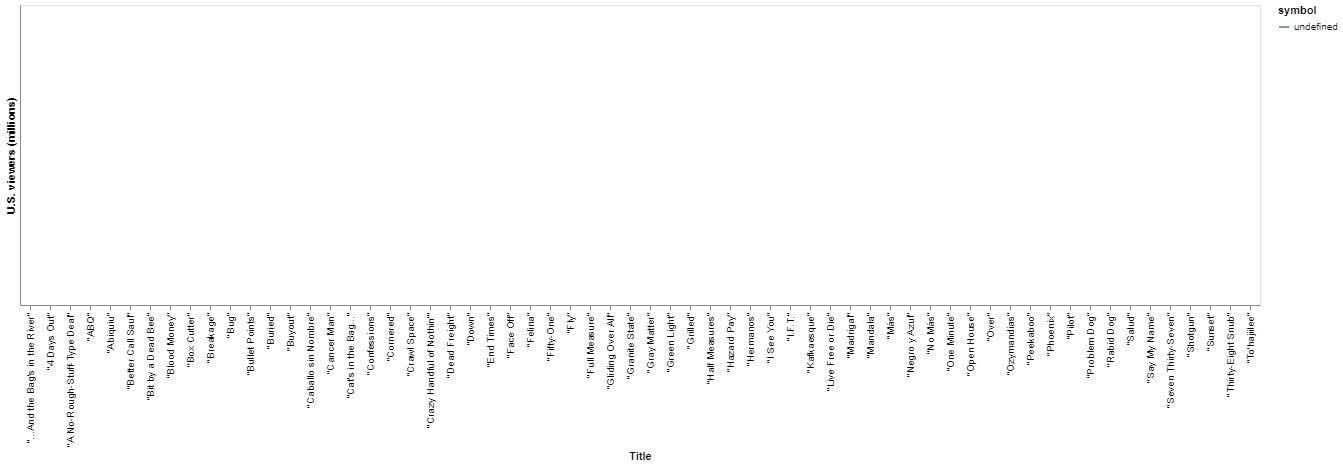

In [23]:
BreakingChart2